In [10]:
import torch 
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import re
torch.__version__

'1.3.1'

In [18]:
import os
path = 'data/'
filenames = os.listdir(path) 
print(len(filenames))

1337


In [24]:
signal_L = list()
signal_types_L = list()
signal_num_L = list()
for name in filenames:
    if name[-4:] == '.npy': 
        signal_type = re.split('signal|_|=|\.',name)[2]
        # we save the signal type in the filename,
        # so here we use regular expression module, to split the filename,
        # and then get the signal types and numbers.
        signal_num = int(re.split('signal|_|=|\.',name)[1])
        signal_types_L.append(signal_type)
        signal_num_L.append(signal_num)
        signal = np.load(path+name)
        signal_L.append(signal)
print(signal_type)
print(re.split('signal|_|=|\.',name))

type
['', '892', 'type', 'dip', 'npy']


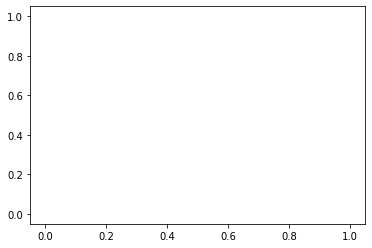

In [25]:
# 用来检查缺失的信号序数，比如[1,2,4]缺失了3
i_not_in_L = list()
for i in range(1200):
    if not i in signal_num_L:
        i_not_in_L.append(i)
plt.plot(i_not_in_L)

In [26]:
if len(signal_L) == len(signal_types_L):
    length = len(signal_L)
    print(length)
else:
    print('something wrong happens')
    print(len(signal_L),len(signal_types_L))

1336


In [78]:
my_signals = pd.DataFrame(columns=('type','data'))
for name in filenames:
    if name[-4:] == '.npy': 
        signal_type = re.split('=|\.',name)[1]
        data = np.load(path+name)
        data = pd.Series(data)
        my_signals.loc[my_signals.shape[0]]={'type':signal_type,'data':data}
# my_signals.to_json('test_set.json')

In [79]:
'dip',(my_signals['type'] == 'dip').sum()
'bipolar',(my_signals['type'] == 'bipolar').sum()
'tanh',(my_signals['type'] == 'tanh').sum()
'gaussian',(my_signals['type'] == 'gaussian').sum()
'linear',(my_signals['type'] == 'linear').sum()
'sinusoidal',(my_signals['type'] == 'sinusoidal').sum()
len(my_signals)

('dip', 286)

('bipolar', 203)

('tanh', 210)

('gaussian', 212)

('linear', 208)

('sinusoidal', 217)

1336

In [89]:
my_signals = my_signals.sample(frac=1)
# shuffle

In [90]:
a_signals = my_signals[:300]
b_signals = my_signals[300:]
# divide signals into train and test sets.
# a: test set; b: train set.

In [93]:
'dip',(a_signals['type'] == 'dip').sum()
'bipolar',(a_signals['type'] == 'bipolar').sum()
'tanh',(a_signals['type'] == 'tanh').sum()
'gaussian',(a_signals['type'] == 'gaussian').sum()
'linear',(a_signals['type'] == 'linear').sum()
'sinusoidal',(a_signals['type'] == 'sinusoidal').sum()
len(a_signals)

('dip', 57)

('bipolar', 52)

('tanh', 39)

('gaussian', 47)

('linear', 47)

('sinusoidal', 58)

300

In [103]:
a_signals = a_signals.reset_index(drop=True)
# reset indices to 1, 2, 3, ...

In [94]:
'dip',(b_signals['type'] == 'dip').sum()
'bipolar',(b_signals['type'] == 'bipolar').sum()
'tanh',(b_signals['type'] == 'tanh').sum()
'gaussian',(b_signals['type'] == 'gaussian').sum()
'linear',(b_signals['type'] == 'linear').sum()
'sinusoidal',(b_signals['type'] == 'sinusoidal').sum()
len(b_signals)

('dip', 229)

('bipolar', 151)

('tanh', 171)

('gaussian', 165)

('linear', 161)

('sinusoidal', 159)

1036

In [104]:
b_signals=b_signals.reset_index(drop=True)

In [105]:
a_signals.to_json('final_test_set.json')
# save to json
# after trying different types of file, we find json the best.

In [106]:
b_signals.to_json('final_train_set.json')